# Сборный проект

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette("husl")
sns.cubehelix_palette(8, start=.5, rot=-.75)
games_data = pd.read_csv('/datasets/games.csv')
display(games_data.head(10))
display(games_data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [2]:
games_data.columns=games_data.columns.str.lower()
def info_column(column):
    print("Данные по", column)
    need_unique=['platform','genre','rating']
    if column in need_unique:
        print("Уникальные значения")
        display(games_data[column].unique())
    display(games_data[column].describe())
    print ()
describe_column=games_data.columns
for name in describe_column:
    info_column(name)

Данные по name


count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object


Данные по platform
Уникальные значения


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

count     16715
unique       31
top         PS2
freq       2161
Name: platform, dtype: object


Данные по year_of_release


count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


Данные по genre
Уникальные значения


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object


Данные по na_sales


count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64


Данные по eu_sales


count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64


Данные по jp_sales


count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64


Данные по other_sales


count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64


Данные по critic_score


count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


Данные по user_score


count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object


Данные по rating
Уникальные значения


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

### Вывод

Массив данных состоит из 16715 строк, в которых описаны продажи 11559 игр на 31 платформах, вышедших с 1980 по 2016 годы. Продажи разделены на три основных региона, и четвертый - по остальным странам. По играм есть также информация об оценках критиков и играков и по присвоенной возрастная категория в соответствии с ESRB. Во многих данный замечено множество пропусков, исправлением которых мы займемся в следующем шаге.

## Шаг 2. Подготовка и обработка данных

Изучим таблицу на наличие дупликатов

In [3]:
games_data.duplicated().sum()

0

На первый взгляд их не обнаруженно. Впрочем, даже приведя название игр к единному регистру, дубликаты не обнаружены, значит, наши данные достаточно чистые. Приводить платформы к единному регистру не будем, потому что по уникальным значениям в прошлом отделе задвоений не обнаружено.

In [4]:
games_data['name']=games_data['name'].str.lower()
games_data.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах в отдельном столбце. Топовые игры имеют достаточно большие продажи, при этом основная доля игр зарабатывает менее двух миллионов.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sales_total, dtype: float64

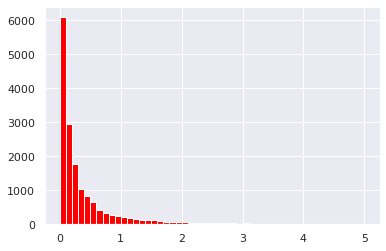

In [5]:
games_data['sales_total']=games_data['na_sales']+games_data['eu_sales']+games_data['jp_sales']+games_data['other_sales']
games_data['sales_total'].hist(bins=50,range=(0,5),color='red')
display (games_data.head(10))
games_data['sales_total'].describe()

Посмотрим пропущенные значения по первому столбику. Это две игры на платформе Gen.

In [6]:
games_data[games_data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Если изучить данные по платформе, то выяснится, что первая неизвестная игра занимает хорошую долю в продажах, поэтому удалять её нельзя. Но, также становится очевидным, что для последняя игра на платформе вышла в 1994 году, и мы в любом случае скорей всего не будем учитывать эти данные для прогноза на 2017 год. Поэтому оставим эти пропуски нетронутыми. Отсутствовать данные могут вследствие какой-то ошибке ввода данных.

In [7]:
print("Суммарные продажи платформы:",games_data.query('platform=="GEN"')['sales_total'].sum())
print("Год издания последний игры на платформе:",games_data.query('platform=="GEN"')['year_of_release'].max())

Суммарные продажи платформы: 30.770000000000003
Год издания последний игры на платформе: 1994.0


In [8]:
games_data['name']=games_data['name'].fillna('uknown_game')

Переведем для удобства названия платформ в нижний регистр.

In [9]:
games_data['platform']=games_data['platform'].str.lower()

Рассмотрим следующий столбик со значением по году релиза. Достаточно много значений пропущенно, однако есть игры, в названиях которых указан год. Как правило это спортивные симуляторы, которые выходят на год раньше указанного года в названии.

In [10]:
display(games_data[games_data['year_of_release'].isnull()])
display(games_data[games_data['year_of_release'].isnull()]['name'].unique())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


array(['madden nfl 2004', 'fifa soccer 2004',
       'lego batman: the videogame', 'wwe smackdown vs. raw 2006',
       'space invaders', 'rock band',
       "frogger's adventures: temple of the frog",
       'lego indiana jones: the original adventures', 'call of duty 3',
       'call of duty: black ops', 'triple play 99', 'adventure', 'combat',
       'lego harry potter: years 5-7', 'nascar thunder 2003',
       'hitman 2: silent assassin', 'legacy of kain: soul reaver',
       'donkey kong land iii', 'air-sea battle', 'suikoden iii',
       'wheel of fortune', 'yakuza 4', 'namco museum', 'rhythm heaven',
       'the lord of the rings: war in the north', 'madden nfl 07',
       'mlb slugfest 20-03', 'shaun white snowboarding',
       'pes 2009: pro evolution soccer', 'warioware: twisted!',
       'madden nfl 11', 'test drive unlimited 2',
       'the chronicles of narnia: the lion, the witch and the wardrobe',
       'monster hunter 2', 'metal gear solid 2: substance',
       'advanc

Добавим играм с годом в названии год релиза исходя из предположения выше (кроме "tomb raider (2013)", где очевидно указан год выхода). Остальные заменять не будем, потому что год релиза не является тем типом переменных, которые можно восстановить из средних данных. Отсутствовать данные могут из-за ошибки сбора данных, потому что у каждой игры должен быть год релиза.

In [11]:
def find_year(row):
    name=row['name'].split()
    year_dict={'99':1998,
         '2001':2000,
         '2002':2001,
         '2003':2002,
         '20-03':2003,
         '2004':2003,
         '2005':2004,
         '06':2005,
         '2006':2005,
         '2k6':2005,
         '2007':2006,
         '07':2006,
         '2008':2007,
         '2k8':2007,
         '2009:':2008,
         '2011':2010,
         '11':2010,
         '(2013)':2013,}
    for part in name:
        if part in year_dict:
            return year_dict[part]
games_data.loc[games_data['year_of_release'].isna(),'year_of_release']=games_data.apply(find_year,axis=1)
games_data[games_data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,rock band,x360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,frogger's adventures: temple of the frog,gba,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
678,lego indiana jones: the original adventures,wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...
16348,agarest senki: re-appearance,ps3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16405,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Количество неизвестных годов сократилось. Переведем значения в формат int, так как год - это целочисленное значение. 

In [12]:
games_data['year_of_release']=games_data['year_of_release'].astype('Int64')

Рассмотрим пропущенные значения по жанрам. Их не хватает по тем играм, у которых нет имен. Оставим их в датасете, пометив как неизвестные. Переведем все жанры в нижний регистр.

In [13]:
display(games_data[games_data['genre'].isnull()])
games_data['genre']=games_data['genre'].str.lower()
games_data['genre']=games_data['genre'].fillna('uknown_genre')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
659,uknown_game,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,uknown_game,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Следующие пропущенные значения у нас в графах оценок критиков и пользователей. Это данные заполнять средними так же не стоит, потому что во-первых, их слишком много, во-вторых, отсутствие оценок может говорить об отсутствии оценок по этим играм в принципе. При оценки влияния оценок на продажи это может быть интересный признак. Отсутствовать данные по игре могут из-за того, что игра недостаточно популярна, чтобы иметь оценку.

In [14]:
display(games_data[games_data['critic_score'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Оценка критиков - целочисленая, с максимальным значением 100, а пользователей - дробная, с максимальным значением 10. Переведем в единный формат - десятичный, разделив значение оценки критиков на 10. Десятичный формат более удобный для восприятия конкретно оценок, поэтому выбран он, а не целочисленный формат.

In [15]:
games_data.loc[games_data['critic_score'].notnull(),'critic_score']=games_data.loc[games_data['critic_score'].notnull(),'critic_score']/10
games_data[games_data['critic_score'].notnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.6,8,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.0,8,E,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,8.9,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,5.8,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16696,breach,pc,2011,shooter,0.01,0.00,0.00,0.00,6.1,5.8,T,0.01
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.00,0.00,5.3,tbd,E,0.01
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.00,0.00,4.8,tbd,E,0.01
16702,storm: frontline nation,pc,2011,strategy,0.00,0.01,0.00,0.00,6.0,7.2,E10+,0.01


В колонке с оценкой юзера много строк принимают значения "tbd". TBD или To Be Determined - это то, что подлежит определению. Поэтому, в отличие от остальных пропусков, нам необходимо их заполнить.

In [16]:
games_data.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,6.1,tbd,E10+,3.97
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,7.1,tbd,E,2.42
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,7.3,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,6.7,tbd,E,0.01
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,5.3,tbd,E,0.01
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,4.8,tbd,E,0.01
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


Изучим корреляцию с другими данными. Достаточная тесная прямая связь наблюдается оценкой критиков. Причем глядя на график,где данные выстраиваются по диагонали, можем предположить, что оценка критика более-менее равна оценке пользователя.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total
year_of_release,1.000000,-0.090362,0.010792,-0.166977,0.042819,-0.011967,-0.266791,-0.072179
na_sales,-0.090362,1.000000,0.765022,0.447850,0.637325,0.233818,0.086200,0.941025
eu_sales,0.010792,0.765022,1.000000,0.432149,0.721688,0.212388,0.055337,0.900868
jp_sales,-0.166977,0.447850,0.432149,1.000000,0.287348,0.146375,0.125598,0.610459
other_sales,0.042819,0.637325,0.721688,0.287348,1.000000,0.191099,0.057119,0.747929
critic_score,-0.011967,0.233818,0.212388,0.146375,0.191099,1.000000,0.580878,0.237351
user_score,-0.266791,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000,0.088179
sales_total,-0.072179,0.941025,0.900868,0.610459,0.747929,0.237351,0.088179,1.000000


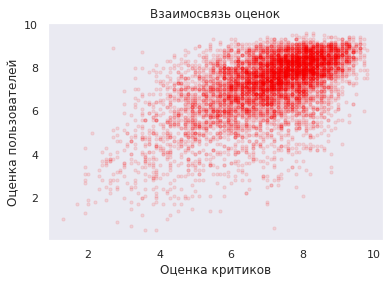

In [17]:
games_data_right=games_data.query('user_score!="tbd"')
games_data_right['user_score']=games_data_right['user_score'].astype('float')
def scatterplot(x_data, y_data,dataset, x_label="", y_label="", title="", color = "red", yscale_log=False):
    _, ax = plt.subplots()
    ax.grid()
    ax.scatter(x_data, y_data, data=dataset, s = 10, color = color, alpha = 0.1)
    if yscale_log == True:
        ax.set_yscale('log')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
scatterplot ('critic_score','user_score',games_data_right,"Оценка критиков","Оценка пользователей", "Взаимосвязь оценок")
games_data_right.corr()

Заменим оценки пользователя со значением "tbd" где это возможно на оценку критиков. Остается еще достаточно много данных с пропусками даже после этой операции.

In [18]:
games_data.loc[((games_data['critic_score'].notna())
                &(games_data['user_score']=="tbd")
                ,'user_score')]=games_data['critic_score']
games_data.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
718,just dance kids,wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,E,2.24
726,dance dance revolution x2,ps2,2009,simulation,1.09,0.85,0.0,0.28,NaN,tbd,E10+,2.22
881,who wants to be a millionaire,pc,1999,misc,1.94,0.00,0.0,0.00,NaN,tbd,E,1.94
...,...,...,...,...,...,...,...,...,...,...,...,...
16655,summer athletics,pc,2008,sports,0.00,0.01,0.0,0.00,NaN,tbd,NaN,0.01
16672,metal gear solid v: the definitive experience,xone,2016,action,0.01,0.00,0.0,0.00,NaN,tbd,M,0.01
16688,outdoors unleashed: africa 3d,3ds,2011,sports,0.01,0.00,0.0,0.00,NaN,tbd,T,0.01
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


Посмотрим от чего еще может зависить оценка. Изучим средние и медианы по платформам...

In [19]:
games_data_right.pivot_table(index='platform', aggfunc={'user_score':['mean','median','min','max']})

user_score                      
                max      mean median  min
platform                                 
3ds             9.1  6.831609   7.10  2.4
dc              9.4  8.528571   8.80  6.0
ds              9.5  7.025194   7.40  0.0
gba             9.6  7.676863   8.00  1.7
gc              9.4  7.597541   7.95  1.4
pc              9.3  7.062468   7.50  1.4
ps              9.4  7.865432   8.30  1.2
ps2             9.5  7.626833   8.00  1.7
ps3             9.1  6.726568   7.10  0.2
ps4             9.2  6.748249   7.00  1.5
psp             9.7  7.228266   7.50  0.6
psv             9.3  7.336364   7.60  1.8
wii             9.3  6.742679   7.15  0.2
wiiu            9.1  6.904000   7.10  2.7
x360            9.0  6.683540   7.00  0.7
xb              9.3  7.500512   8.00  0.5
xone            9.2  6.521429   6.80  1.6

... И по жанрам. По платформам значения различаются значения сильнее, поэтому возьмем этот фактор. Кроме того, медиана кажется более правильным значением,так как разброс от минимального к максимальному слишком велик и скорей всего из-за этого занижены.

In [20]:
games_data_right.pivot_table(index='genre', aggfunc={'user_score':['mean','median','min','max']})

user_score                      
                    max      mean median  min
genre                                        
action              9.5  7.054044    7.4  0.3
adventure           9.4  7.133000    7.6  0.0
fighting            9.2  7.302506    7.6  0.9
misc                9.2  6.819362    7.1  0.5
platform            9.4  7.301402    7.7  0.2
puzzle              9.5  7.175000    7.5  1.1
racing              9.5  7.036193    7.4  0.3
role-playing        9.7  7.619515    7.8  1.4
shooter             9.3  7.041883    7.4  1.2
simulation          9.6  7.134593    7.5  2.1
sports              9.5  6.961197    7.4  0.2
strategy            9.4  7.295177    7.8  0.6

Однако есть проблема, что по некоторым платформам нет информации об оценках пользователей. В таком случае мы заменим на медиану по всему датасету за неимением лучших значений. 

In [21]:
data_median=games_data_right.pivot_table(index='platform',values='user_score',aggfunc='median')
unique=games_data['platform'].unique()
def find_score_platform(row):
    platforms=row['platform']
    median_total=games_data_right['user_score'].median()
    if platforms in data_median.index:
        new_score=data_median.loc[platforms]['user_score']
        return new_score
    else:
        return median_total
games_data.loc[games_data['user_score']=='tbd','user_score']=games_data.apply(find_score_platform,axis=1)
games_data['user_score']=games_data['user_score'].astype('float')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16473 non-null Int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
sales_total        16715 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


Данные по рейтингу организации ESRB могут отсутствовать по разным причинам. Например, потому что игра вышла раньше, чем основана организация (1994). Или потому, что игра не продавалась в регионе, где организация дает оценку, а именно в Северной Америке. Однако, остается еще достаточно много данных по играм, не попадающим под эти причины. Возможно, отсутствие рейтинга объясняется проблемами с разным написанием названий игр, из-за чего собраны неполные данные. По этой же причине могут остуствовать в этих играх оценки критиков и пользователей. К сожалению, исправить эту ошибку без дополнительного сбора данных мы не можем без искажения информации, которая нам нужна для дальнейшего анализа, поэтому оставим пропуски как есть.

In [22]:
games_data[games_data['rating'].isna()].query('na_sales>0 and year_of_release>1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
20,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
25,pokemon ruby/pokemon sapphire,gba,2002,role-playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN,15.84
...,...,...,...,...,...,...,...,...,...,...,...,...
16675,original frisbee disc sports: ultimate & golf,ds,2007,action,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16693,pga european tour,n64,2000,sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16694,carmageddon 64,n64,1999,action,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16708,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод

На данном шаге подготовлены данные к дальнейшему анализу. Названия столбцов, а также данные с названием, платформой и жанром игр приведены к нижнему регистру. Восстановлены данные по году релиза там, где это возможно. Пропуски со значением "tbd" заполнены тремя разными способами - приравнены к оценке критиков, где она есть, заполнены медианым значением по платформе, где это значение есть по платформе, и, наконец, простой медианой по датасету. Объяснены причины возникновения пропусков. Посчитаны суммарные продажи по всему миру.

## Шаг 3. Анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Построим график выпуска игр по годам. По нему можно отметить, что игровая индустрия начала активно развиваться в серидине 90-тых, в нулевые пережила сильный рост с пиком в 2008 году, после произошел откат. После 2012 годуиндустрия устоялась на более-менее одном уровне. 2016 год показывает снижение, но в условиях есть допущение, что данные могут быть не полными. Для прогноза и оценки положения данные за все периоды нам не столько важны, и исходя из этого графика как раз данные с 2012 года больше отражают рыночную ситуацию, а значения за прошлые годы могут сформировать завышенный уровень ожиданий.

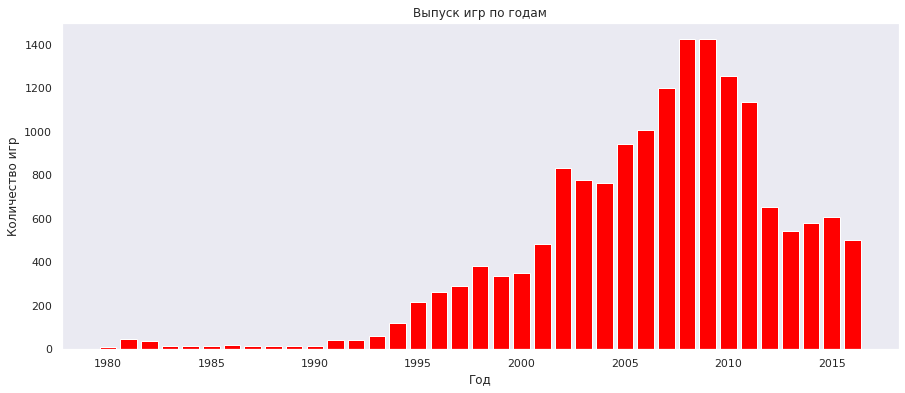

In [23]:
games_years=games_data.pivot_table(index='year_of_release',values='name',aggfunc='count')
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    fig, ax = plt.subplots(figsize=(15,6))
    ax.bar(x_data, y_data, color = 'red', align = 'center')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.grid()
    ax.set_title(title)
games_years.reset_index(inplace=True)
barplot(games_years['year_of_release'], games_years['name'],"Год","Количество игр","Выпуск игр по годам")

In [24]:
print("Максимальное число игр в год-",games_years['name']. max())

Максимальное число игр в год- 1428


Построим график по пяти самым популярным платформам за весь период. Что видно сразу - это странное значение по платформе "DS"в 1985 году.

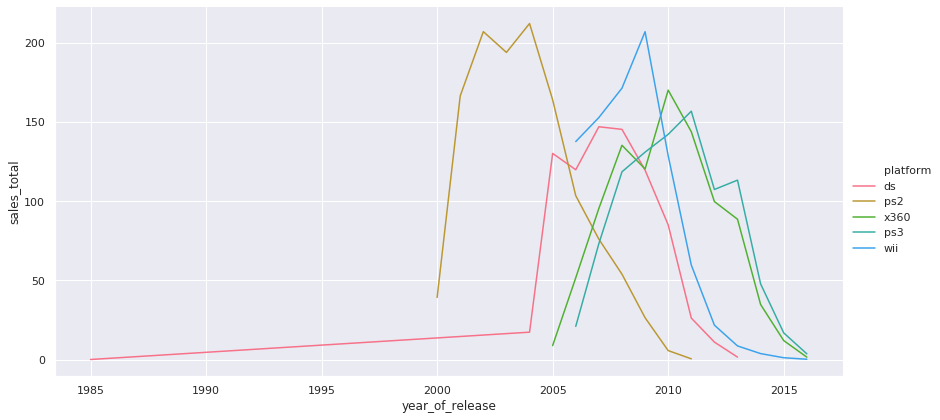

In [25]:
def platform_top_plot(data):
    games_platform=data.pivot_table(
        index='platform',
        values='sales_total',
        aggfunc='sum')
    top_5_platform=(games_platform
                .sort_values(
                    by='sales_total',
                    ascending=False)
                .head(5).index)
    games_platform_years=(data
                      .query('platform in @top_5_platform')
                      .pivot_table(
                          index=['year_of_release','platform'],
                          values='sales_total',
                          aggfunc='sum')
                     )
    games_platform_years.reset_index(inplace=True)
    sns.relplot(x="year_of_release",
            y="sales_total", 
            hue="platform", kind="line", data=games_platform_years, height=6, aspect=2)
platform_top_plot(games_data)

Это значение наблюдается всего у 1 игры, и больше похоже на аномальное. Скорей всего, это "тезка" платформы, которая была популярна в нулевые, построим график с исключенным значением. Топ-5 платформ за весь рассматриваемый период - PS2, DS, X360, PS3 и Wii. Все топ-5 платформ набрали популярность в нулевые, и к 2016 производство игр для них либо прекратилось полностью, либо спало до минимума.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


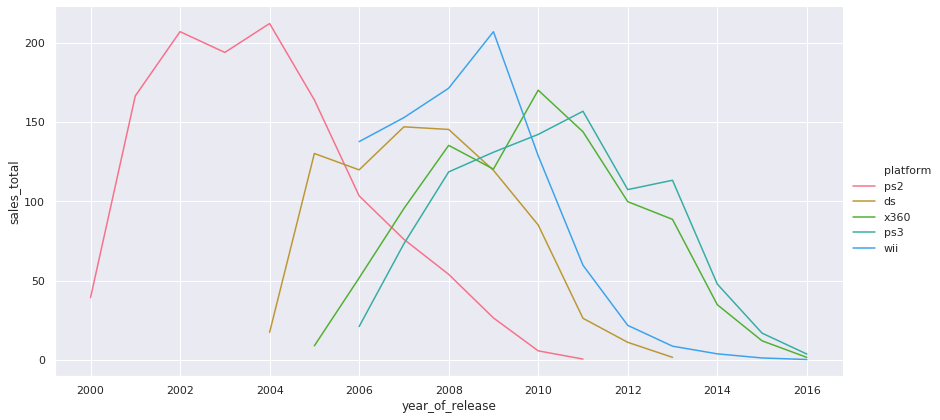

In [26]:
display(games_data.query('year_of_release<=2000 and platform=="ds"'))
platform_top_plot(games_data.query('year_of_release>=2000'))


Если смотреть гграфик за весь период, то можно отметить, что в восьмидесятые была популярна платформа NES,в девяностые - SNES, а в десятые набирают популярность PS4 и XOne.

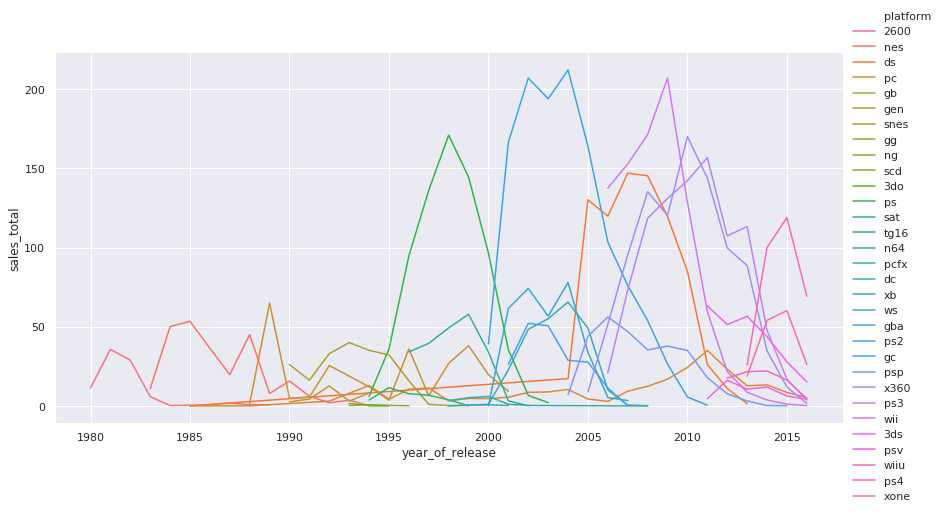

In [27]:
def platform_plot(data):
    games_platform_years_full=(data
                      .pivot_table(
                          index=['year_of_release','platform'],
                          values='sales_total',
                          aggfunc='sum')
                     )
    games_platform_years_full.reset_index(inplace=True)
    sns.relplot(x="year_of_release",
            y="sales_total", 
            hue="platform", kind="line", data=games_platform_years_full, height=6, aspect=2)
platform_plot(games_data)

Построим отдельные графики для каждой платформы.

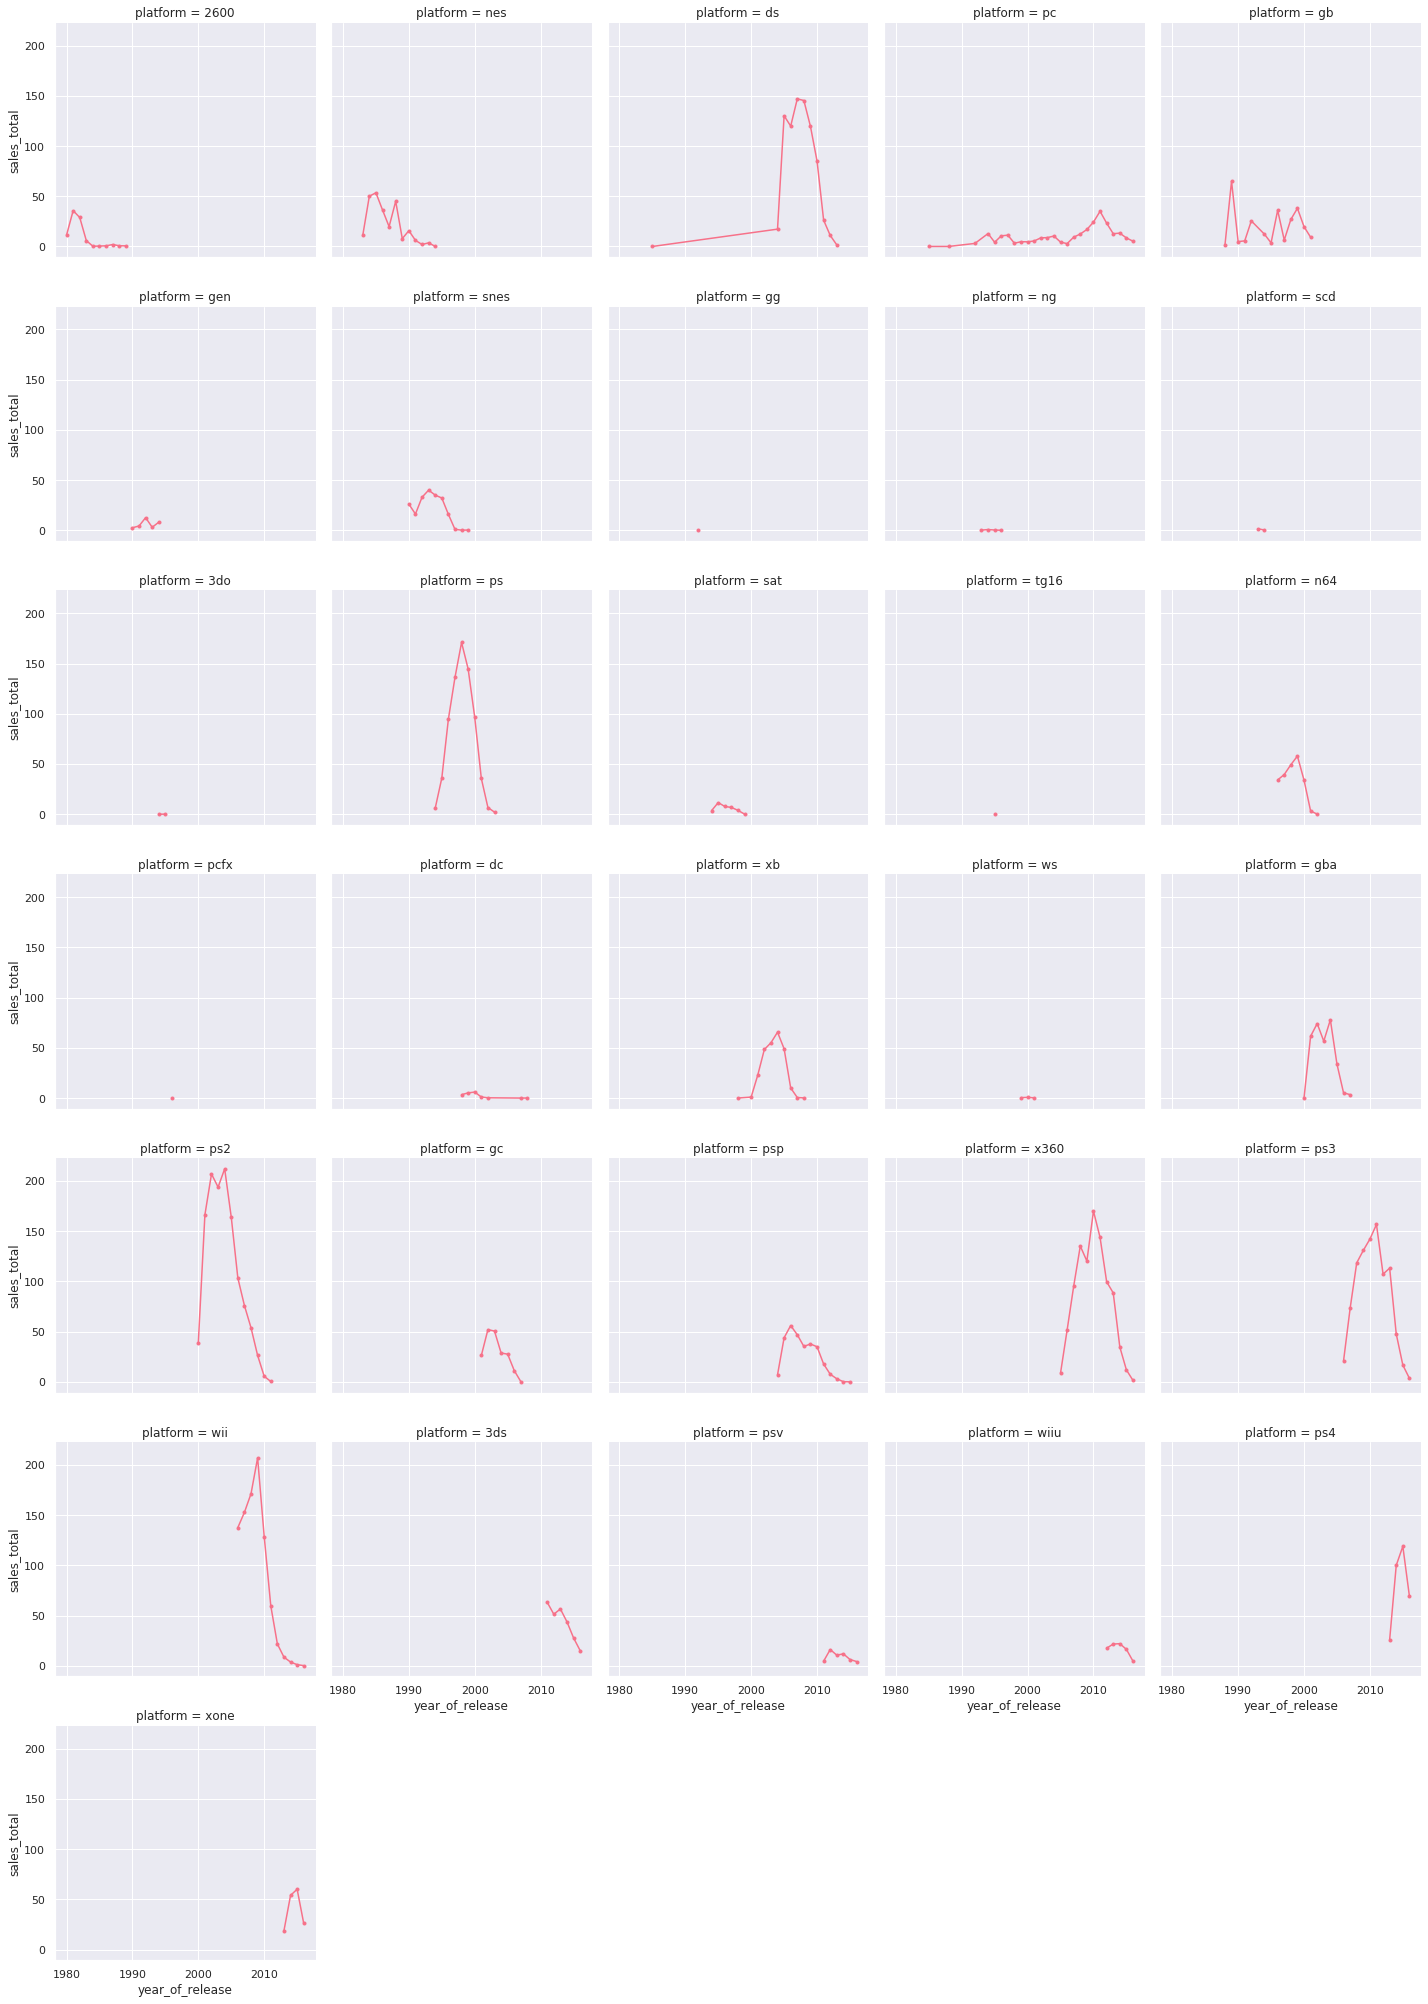

In [28]:
games_platform_years_full=(games_data
                      .pivot_table(
                          index=['year_of_release','platform'],
                          values='sales_total',
                          aggfunc='sum')
                     )
games_platform_years_full.reset_index(inplace=True)
g = sns.FacetGrid(games_platform_years_full, col="platform", col_wrap=5, height=4)
g = g.map(plt.plot, "year_of_release", "sales_total", marker=".")

Определим сколько времени проходит в целом с выпуска первой игры до выпуска первой игры на платформе. Исключим игру, которую мы отметили ранее. Исключим платформы, у которых год выпуска последний игры 2016, потому что жизненный цикл этих платформ с большой вероятностью еще не закончился. По полученным даным выходит, что в среднем игры выходят на платформе 6 лет.

In [29]:
games_life=(games_data
            .query('name != "strongest tokyo university shogi ds"')
            .pivot_table(index='platform'
                         ,values="year_of_release"
                         ,aggfunc=['max','min'])
           )
games_life.columns=['last_year','first_year']
games_life['life_duration']=games_life['last_year']-games_life['first_year']
life_cicle=round(games_life.query('last_year<2016')['life_duration'].mean(),1)
print("Жизненный цикл платформы в среднем",life_cicle, "лет")
games_life

Жизненный цикл платформы в среднем 6.2 лет


,last_year,first_year,life_duration
platform,,,
2600,1989,1980,9
3do,1995,1994,1
3ds,2016,2011,5
dc,2008,1998,10
ds,2013,2004,9
gb,2001,1988,13
gba,2007,2000,7
gc,2007,2001,6
gen,1994,1990,4


Возьмем данные за выделенный нам период начиная с 2012. По состоянию на 2016 год игры выпускались на 9 платформ. При этом самые новые платформы возникли в 2013 году. Выпуск на 2 платформы - DS и PSP - прекратился за последние пять лет.

Список платформ, на котрые выпускались игры в 2016 году


Index(['3ds', 'pc', 'ps3', 'ps4', 'psv', 'wii', 'wiiu', 'x360', 'xone'], dtype='object', name='platform')

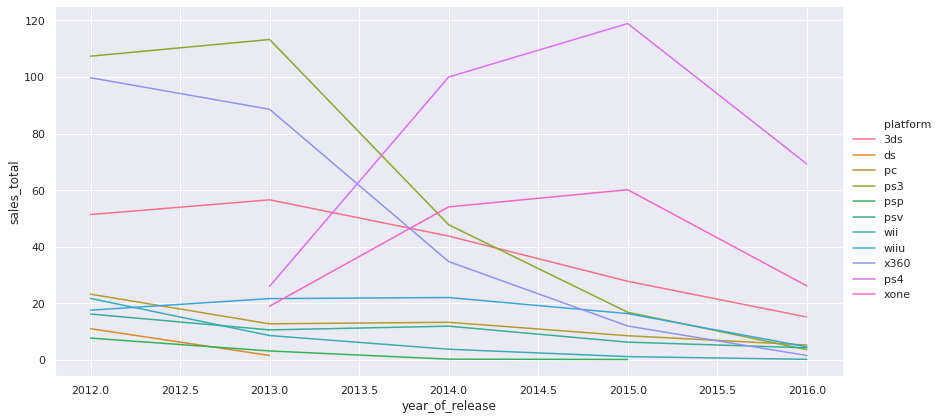

In [30]:
actual_games_data=games_data.query('year_of_release>=2012')
print('Список платформ, на котрые выпускались игры в 2016 году')
display(games_life.query('last_year==2016').index)
platform_plot(actual_games_data)

Построение графика по пяти самым популярным платформам за эти годы также подтвержлает, что самыми перспективными на 2016 год являются PS4 и XOne. Их падение в 2016 году может быть обусловленно тем, что за этот год собраны не все данные. Поэтому в 2017 году от них также можно ожидать наибольшую прибыль.

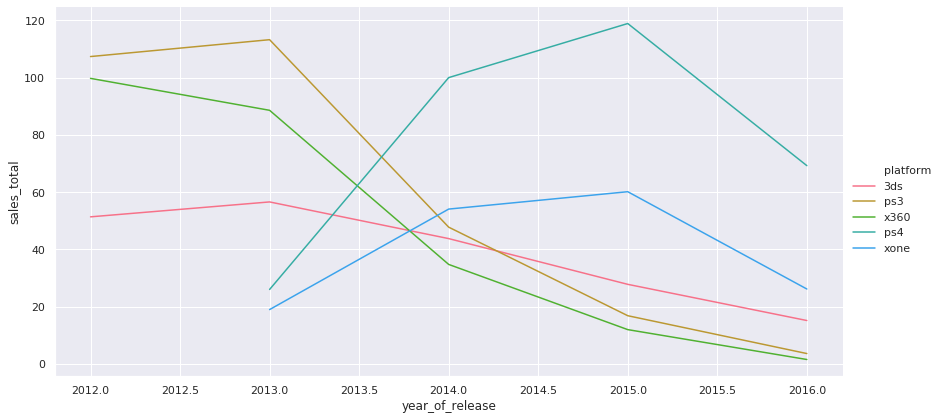

In [31]:
platform_top_plot(actual_games_data)

Построим график распределения средней мировой выручки продаж игр по платформам. На данный момент видно много выбросов, что заметно снижает читаемость графика.

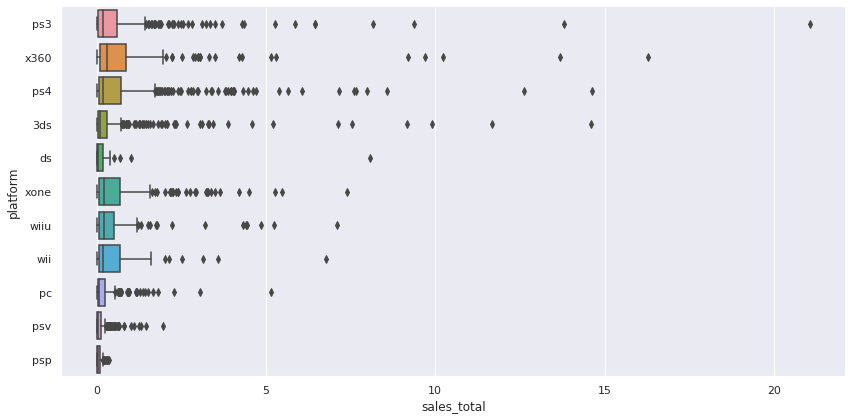

In [32]:
sns.catplot(y="platform", x="sales_total",kind='box', data=actual_games_data, orient='h',height=6, aspect=2)

 Рассмотрим данные поближе. Х360 - самая прибыльная платформа с самой большой медианой. XOne и Wiiu имеют почти одинаковую медиану, но при этом у Xone размах больше, и граница в 75% значений лежит дальше, что делает платформу более привлекательной. Самыми невыгодными являются платформы psp и psv. Также хорошие значения показывает PS3.

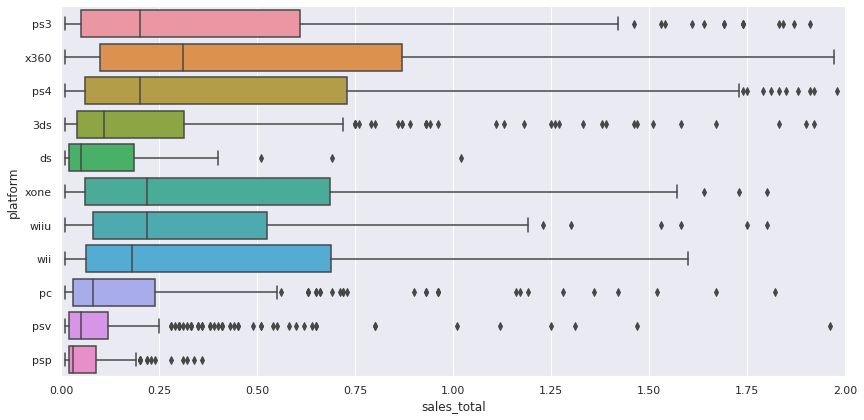

In [33]:
us=sns.catplot(y="platform", x="sales_total",kind='box', data=actual_games_data, orient='h',height=6, aspect=2)
us.set(xlim=(0,2 ))

Если же совсем выделяющиеся значения исключить из выборки и ограничить по верхнему значению X360,то X360 всё еще будет безусловным лидером, но Wiiu займет второе место с небольшим отрывом.

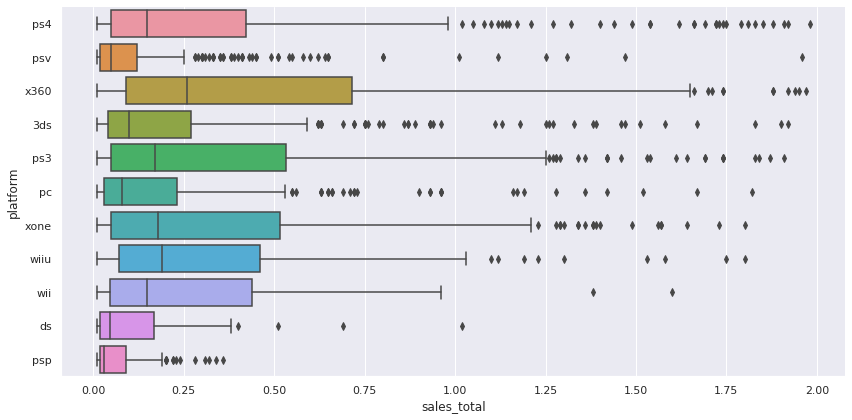

In [34]:
sns.catplot(
    y="platform"
    , x="sales_total"
    , kind='box'
    ,data=actual_games_data.query('sales_total<=2')
    , orient='h'
    ,height=6
    , aspect=2
)

Корреляция выручки с оценками критиков: 0.361
Корреляция выручки с оценками пользователей: -0.003


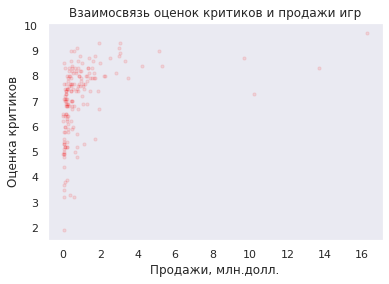

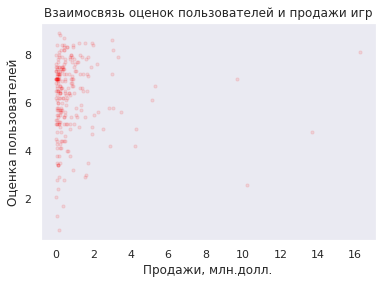

In [35]:
def correlation_sales_score(data):
    scatterplot ('sales_total'
                 ,'critic_score'
                 ,data
                 ,"Продажи, млн.долл."
                 ,"Оценка критиков"
                 , "Взаимосвязь оценок критиков и продажи игр"
                 )
    print("Корреляция выручки с оценками критиков:",round(data['sales_total'].corr(data['critic_score']),3))
    scatterplot ('sales_total'
                 ,'user_score'
                 ,data
                 ,"Продажи, млн.долл."
                 ,"Оценка пользователей"
                 , "Взаимосвязь оценок пользователей и продажи игр"
                )
    print("Корреляция выручки с оценками пользователей:",round(data['sales_total'].corr(data['user_score']),3))
correlation_sales_score(actual_games_data.query('platform=="x360"'))

Если же брать самую популярную платформу на 2016 год, то связь с оценкой критиков становится сильнее.

Корреляция выручки с оценками критиков: 0.407
Корреляция выручки с оценками пользователей: -0.034


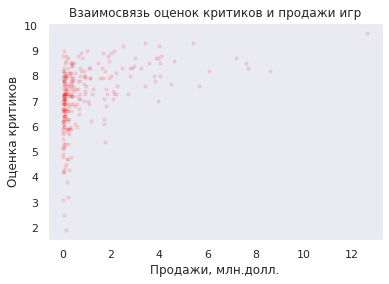

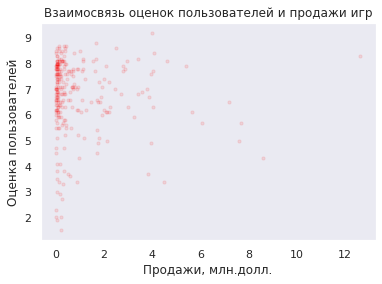

In [36]:
correlation_sales_score(actual_games_data.query('platform=="ps4"'))

Третья платформа, сочитающая в себе и достаточно большую долю в продажах 2016 года, и большое медианное значение, - XOne.  По ней все связи выражены сильнее. Однако, связь выручки с оценками пользователей всё еще очень слабая,и, что интересно, отрицательная.

Корреляция выручки с оценками критиков: 0.417
Корреляция выручки с оценками пользователей: -0.069


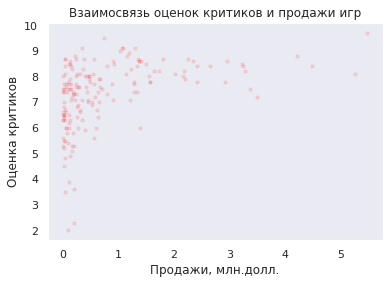

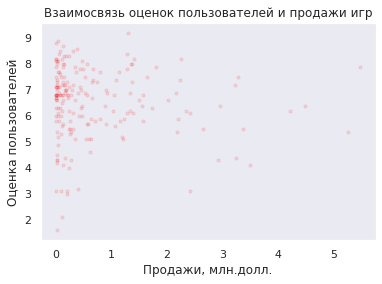

In [37]:
correlation_sales_score(actual_games_data.query('platform=="xone"'))

Если брать данные по всем продажам, то связи выражены слабее. Это можно объяснить тем, что часть пропущенных значений по оценкам пользователей мы заполняли медианными по платформе. Можем заключить, что слабая связь оценки критиков с выручкой существует.

Корреляция выручки с оценками критиков: 0.308
Корреляция выручки с оценками пользователей: -0.005


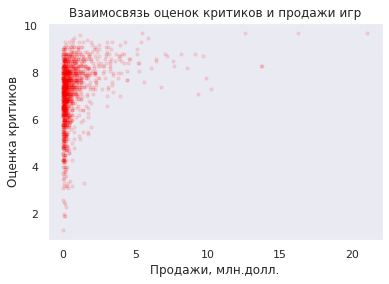

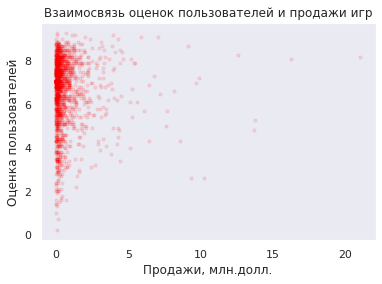

In [38]:
correlation_sales_score(actual_games_data)

Самый прибыльный жанр - Action, на него приходится 30,5% продаж. Второй по прибыльности жанр - Shooter (21% продаж). Role-playing и Sports также достаточно популярны. Остальные жанры значительно уступают в продажах,а жанр puzzle самый непопулярный. Разница между жанрами с низкими и высокими продажами значительна.

,sales_total,share
genre,,
action,441.47,0.305
shooter,304.73,0.211
role-playing,192.80,0.133
sports,181.07,0.125
misc,85.04,0.059
platform,61.00,0.042
racing,53.50,0.037
fighting,44.49,0.031
simulation,35.12,0.024


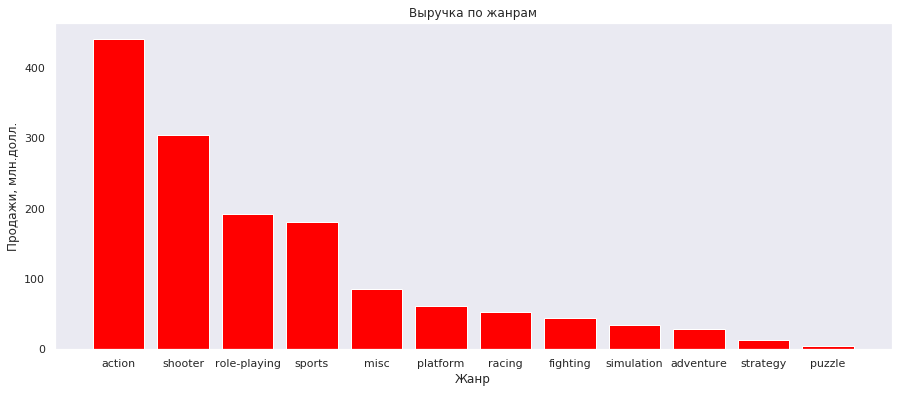

In [39]:
def popular(column,value,n,x_index,y_index,title):
    data=(actual_games_data
          .pivot_table(index=column
                       ,values=value
                       ,aggfunc='sum')
          .sort_values(by=value, ascending=False)
         )
    data['share']=(round
                       (data[value]
                        /data[value]
                        .sum()
                        ,3)
                      )
    display(data.head(n))
    barplot(data.index
            ,data[value]
            ,x_index
            ,y_index
            ,title)
popular('genre','sales_total',12
        ,"Жанр"
        ,"Продажи, млн.долл."
        ,"Выручка по жанрам")

### Вывод

В этом разделе были проанализированы данные по выпуску игр за разные годы. Рынок компьютерных игр сильней всего развивался в 2000-ые и достиг пика в 2018 году, когда было выпущено 1428 наименований. Начиная с 2012 года рынок значительно просел до 500-600 игр в год, и этот период, и этот период нам интересен для дальнейшего анализа, так как наиболее точно отражает нынешние тенденции. Средний период от выпуска первой игры на платформе до последней составляет 6,2 года. Самые популярные платформы за весь период наблюдения - PS2, DS, X360, PS3 и Wii. Все они значительно потеряли актуальность к 2016 году, так как выпущены были в нулевые.  Самыми перспективными платформами на 2016 год являются PS4 и XOne. Самое большое за последние годы медианное значение прибыли на одну игру принадлежит платформе Х360, но так как выпуск игр на эту платформу падает, то лучше по этому параметру выделить более новую платформу XOne, которая немного отстает. При анализе данных по платформам X360,PS4 и XOne обнаружена слабая прямая связь оценок критиков и выручки за игру. При этом связь продаж с оценками пользователей незначительна. Самые прибыльные жанры - Action и Shooter. Role-playing и Sports также достаточно популярны. Остальные жанры значительно уступают в продажах.


## Шаг 4. Портрет пользователя каждого региона

На этом шаге мы рассмотрим как различается поведение пользователях в трех основных регионах - Северной Америке, Европе и Японии.

### Северная Америка

Рассмотрим топ-5 самых популярных платформ в Америке за 2012-2016 годы. Самые большие продажи у уходящей с рынка X360, следом с небольшой разницей два разных поколения - PS4 и PS3. Перспективная XOne на четвертом месте, а 3DS занимает пятое место с большим отрывом.

Топ-5 платформ в Северной Америке


,na_sales,share
platform,,
x360,140.05,0.237
ps4,108.74,0.184
ps3,103.38,0.175
xone,93.12,0.158
3ds,55.31,0.094


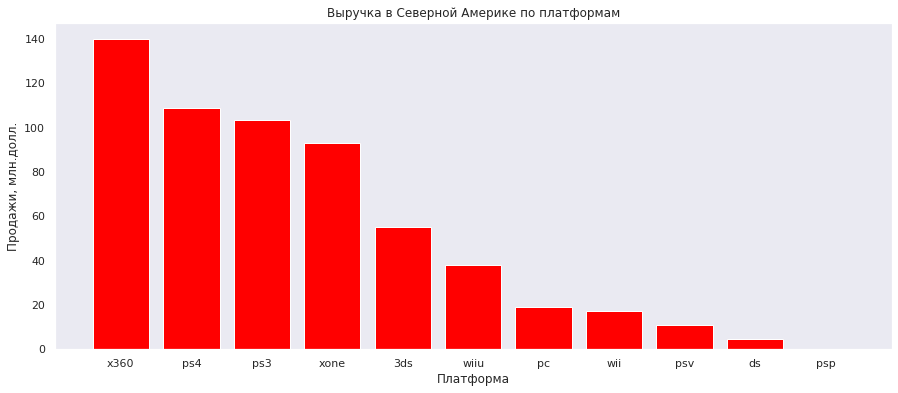

In [40]:
print("Топ-5 платформ в Северной Америке")
popular('platform','na_sales',5
        ,"Платформа"
        ,"Продажи, млн.долл."
        ,"Выручка в Северной Америке по платформам")

Пятерка основных самых популярных жанров повторяет общемировую, но при этом в Северной Америке больше любят игры в жанре Shooter и Sports, а жанр Role-Playing им наоборот нравится меньше.

Топ-5 жанров в Северной Америке


,na_sales,share
genre,,
action,177.90,0.301
shooter,144.77,0.245
sports,81.53,0.138
role-playing,64.00,0.108
misc,38.19,0.065


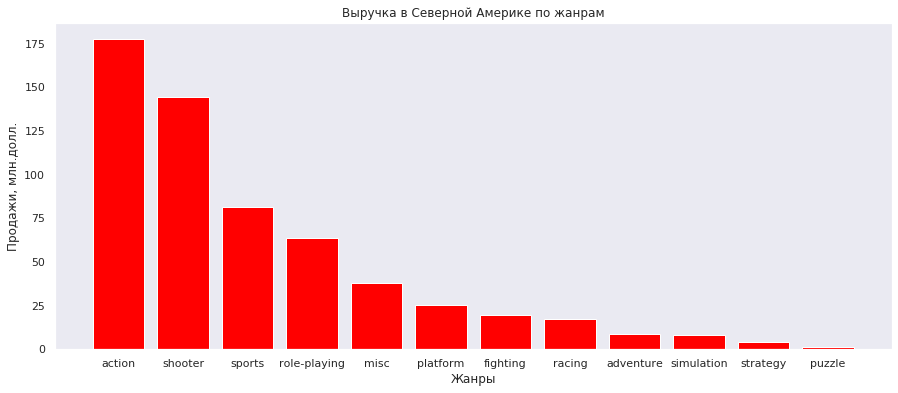

In [41]:
print("Топ-5 жанров в Северной Америке")
popular('genre','na_sales',5
        ,"Жанры"
        ,"Продажи, млн.долл."
        ,"Выручка в Северной Америке по жанрам")

Самое большое медианное значение наблюдается у игры для взростых (Рейтинг M). У игр для всех от 10 лет больше медиана, чем у игр для всех, но у игр для всех больше разброс значений. Игры для подростков самые непопулярные.

Влияние рейтинга на продажи в Северной Америке


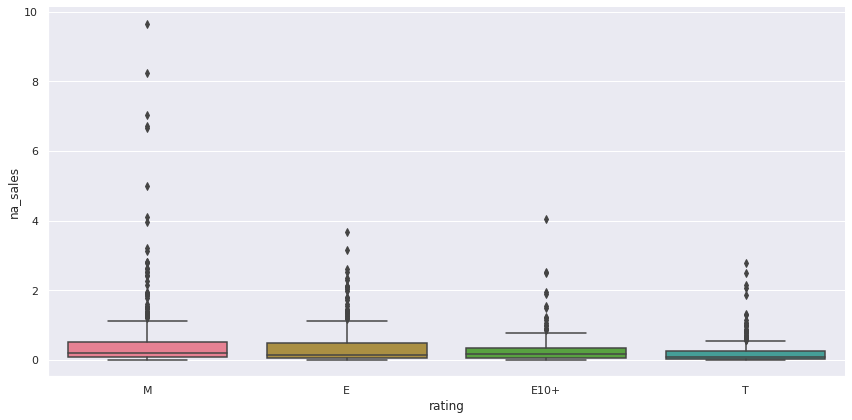

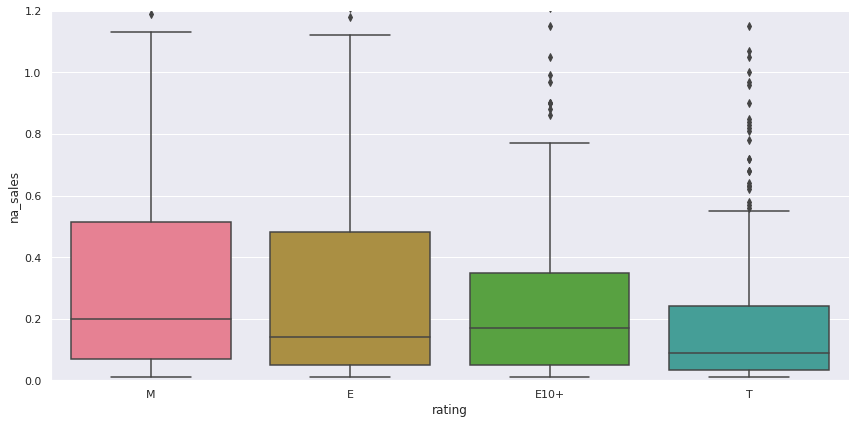

In [42]:
def rating_info(region,y_max):
    sns.catplot(
        x="rating"
        , y=region
        , kind='box'
        ,data=actual_games_data.loc[actual_games_data[region]>0]
        ,height=6
        , aspect=2
    )
    double=sns.catplot(
       x="rating"
        , y=region
        , kind='box'
        ,data=actual_games_data.loc[actual_games_data[region]>0]
        ,height=6
        , aspect=2
    )
    double.set(ylim=(0,y_max))
print("Влияние рейтинга на продажи в Северной Америке")
rating_info('na_sales',1.2)

### Европа

Рассмотрим топ-5 самых популярных платформ в Евроме. Самые большие продажи у PS4,которая в америке занимала второе место. Следом идет прошлое поколение - PS3. Самая успешная платформа в Северной Америке - x360- занимает всего третье место. Как и в Северной Америке XOne на четвертом месте, а 3DS занимает пятое место, но уже не с таким с большим отрывом.

Топ-5 платформ в Европе


,eu_sales,share
platform,,
ps4,141.09,0.278
ps3,106.86,0.211
x360,74.52,0.147
xone,51.59,0.102
3ds,42.64,0.084


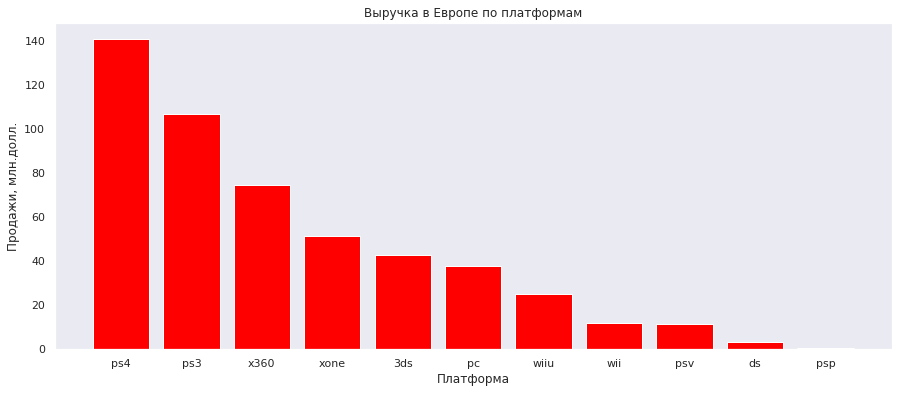

In [43]:
print("Топ-5 платформ в Европе")
popular('platform','eu_sales',5
        ,"Платформа"
        ,"Продажи, млн.долл."
        ,"Выручка в Европе по платформам")

В Европе в топ-5 популярных жанров попадает Racing. Action в Европе пользуется большей популярностью, чем по миру и в Северной Америке,а жанре Shooter имеет большую долю, чем в среднем по миру, но меньшую, чем в Северной Америке. Также более популярен жанр Sports, а жанр Role-Playing пользуется меньшим спросом, чем в среднем по миру.

Топ-5 жанров в Европе


,eu_sales,share
genre,,
action,159.59,0.315
shooter,113.47,0.224
sports,69.09,0.136
role-playing,48.53,0.096
racing,27.29,0.054


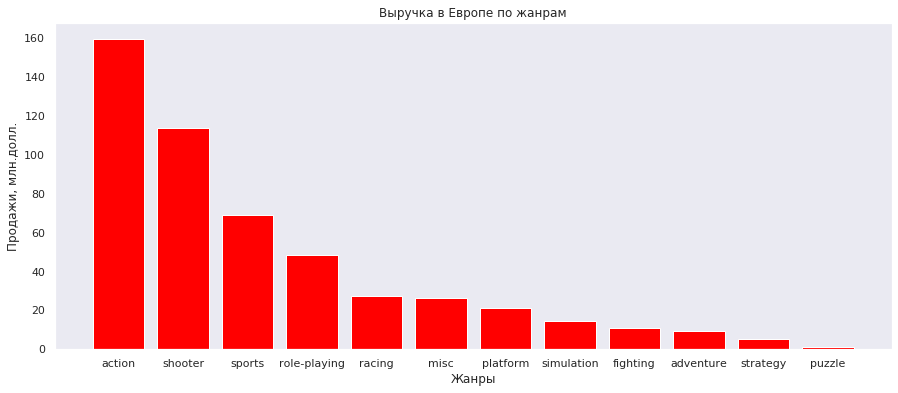

In [44]:
print("Топ-5 жанров в Европе")
popular('genre','eu_sales',5
        ,"Жанры"
        ,"Продажи, млн.долл."
        ,"Выручка в Европе по жанрам")

Ситуация с рейтингами в Европе похожа на американскую, но при этом у игр для всех разброс значений меньше.

Влияние рейтинга на продажи в Европе


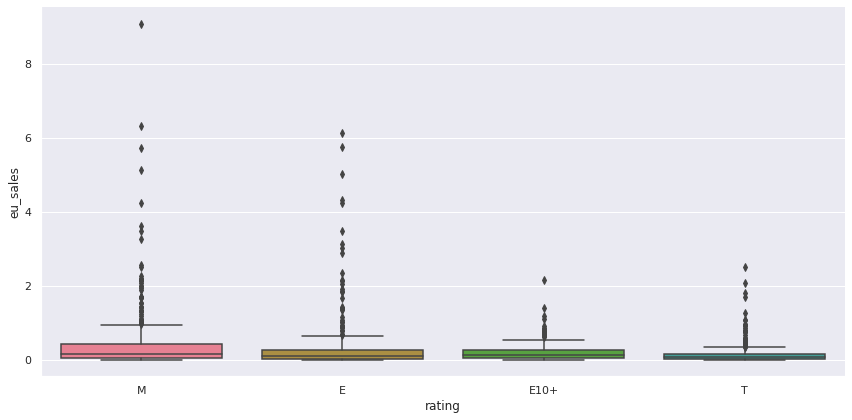

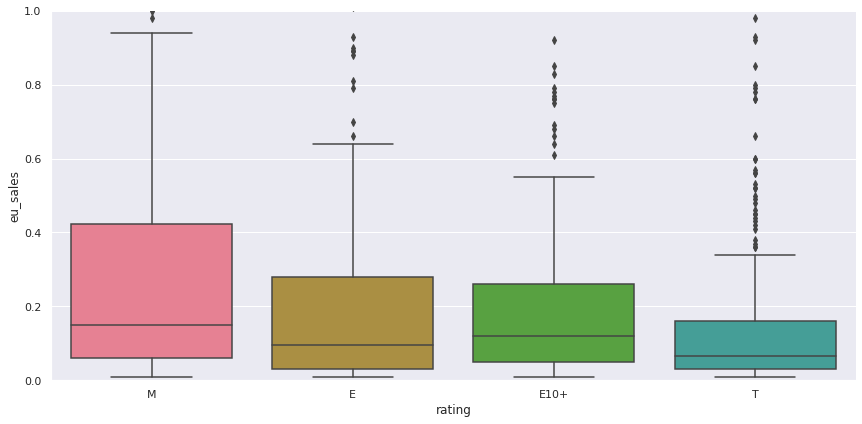

In [45]:
print("Влияние рейтинга на продажи в Европе")
rating_info('eu_sales',1)

### Япония

Ситуация с топом-5 в Японии значительно отличается от остальных регионов. Самые большие продажи c большим отрывом у платформы 3DS. Следом PS3 и отсутствующая в топах других регионов  PSV. PS4 всего лишь на четвертом местес долей 8%, а Wiiu  занимает пятое место, также не представленная в топах других регионов.

Топ-5 платформ в Японии


,jp_sales,share
platform,,
3ds,87.79,0.456
ps3,35.29,0.183
psv,21.04,0.109
ps4,15.96,0.083
wiiu,13.01,0.068


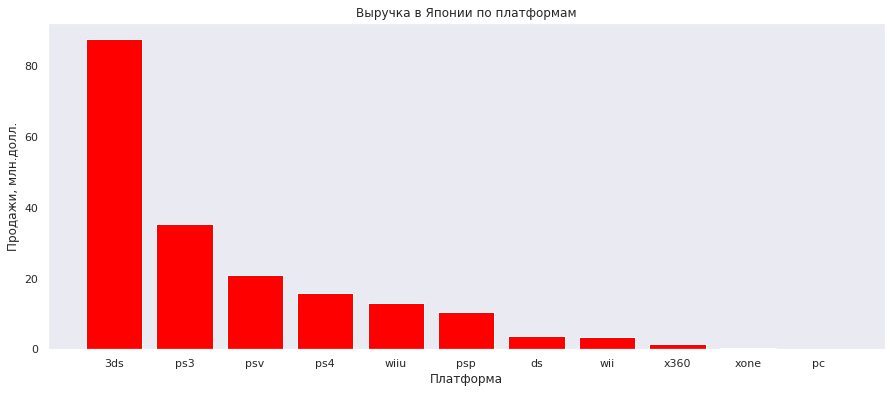

In [46]:
print("Топ-5 платформ в Японии")
popular('platform','jp_sales',5
        ,"Платформа"
        ,"Продажи, млн.долл."
        ,"Выручка в Японии по платформам")

Популярные жанры также распределены иначе. 34% выпучки приходится на Role-Playing, при небольшой доли этого жанра в других регионах. Action занимает вторую позицию. Еще 7 жанров занимает почти одинаковую долю, из них можно выделить Mics, Simulation и Fighting.

Топ-5 жанров в Японии


,jp_sales,share
genre,,
role-playing,65.44,0.340
action,52.80,0.274
misc,12.86,0.067
simulation,10.41,0.054
fighting,9.44,0.049


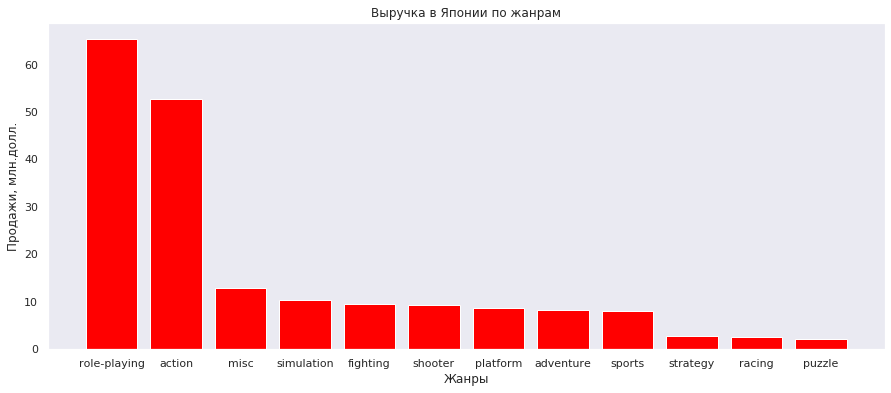

In [47]:
print("Топ-5 жанров в Японии")
popular('genre','jp_sales',5
        ,"Жанры"
        ,"Продажи, млн.долл."
        ,"Выручка в Японии по жанрам")

Самое большое медианое значение в Японии у игр для всех. В отличие от других регионов довольно популярен рейтинг для подростков, в то время как игры для взрослых пользуются меньшей популярностью.

Влияние рейтинга на продажи в Японии


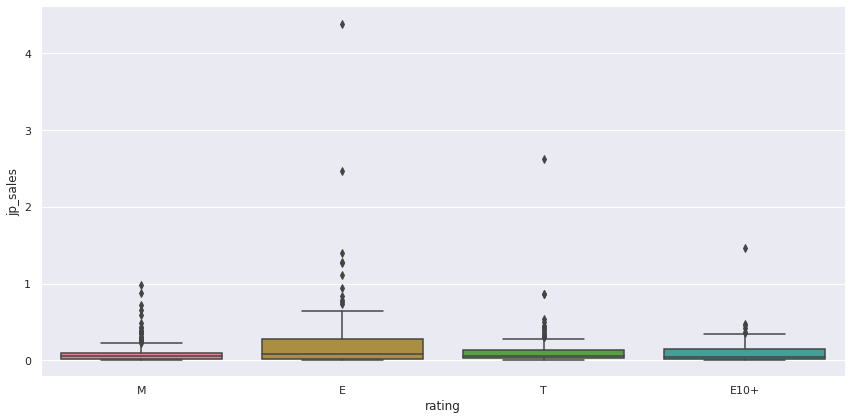

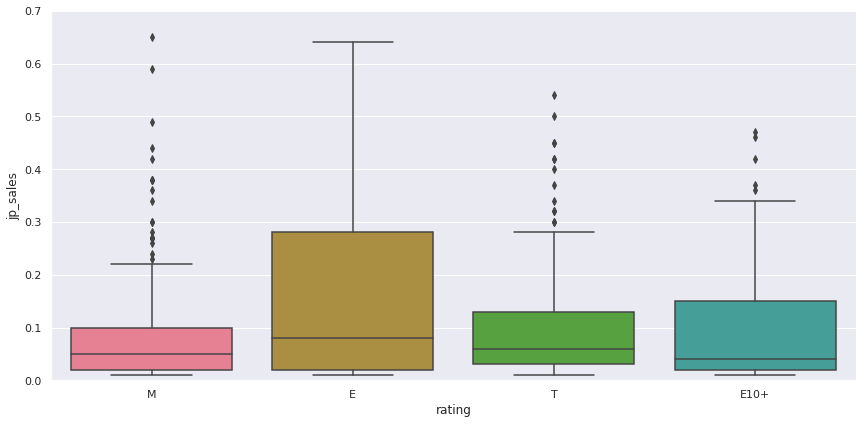

In [48]:
print("Влияние рейтинга на продажи в Японии")
rating_info('jp_sales',0.7)

### Вывод

Прогнозирая продажи игр следует учитывать специфику регионов. И если поведение потребителей в Европе и Северной более-менее похоже, то в Японии оно сильно отличается. Для Северной Америке самая популярная платформа - X360, в Европе - PS4, в Японии - 3DS. В Северной Америке и Европе пользуются успехом жанры Action и Shooter, а в Японии - Role-Playing и Action. Игры для взрослых прибыльнее в Северной Европе и Америке, а в Японии предпочитают игры для всех и игры для подростков.

## Шаг 5. Проверка гипотез

Проверим средние пользовательские рейтинги платформ Xbox One и PC на равенство. Сформулируем нулевую и альтернативную гипотезы.

Но: средние по пользовательнским рейтингам двух совокупностей - игр платформ Xbox One и PC - равны между собой.

Н1: средние по пользовательнским рейтингам двух совокупностей различаются.

p-значение: 0.6854348156968559
Не получилось отвергнуть нулевую гипотезу


Text(0.5, 1.0, 'Пользовательские рейтинги по платформе')

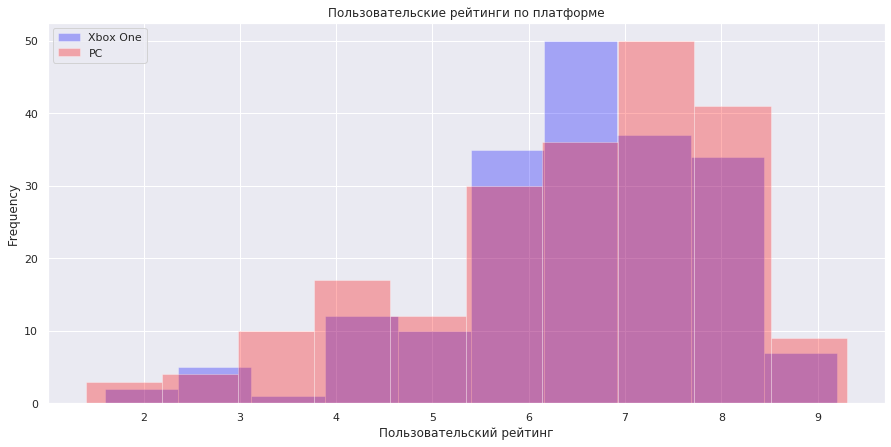

In [49]:
xone_score=(actual_games_data
              .query('platform=="xone"')
              .pivot_table(index=['name'], 
                           columns=None, 
                           values='user_score' 
                          )
                        )
pc_score=(actual_games_data
              .query('platform=="pc"')
              .pivot_table(index=['name'], 
                           columns=None, 
                           values='user_score'
                          )
         )
xone_score['user_score'].plot(kind='hist'
                              , bins=10
                              , facecolor='blue'
                              , alpha=0.3
                              , label="Xbox One",figsize=(15,7))
pc_score['user_score'].plot(kind='hist'
                            , bins=10
                            , facecolor='red'
                            , alpha=0.3
                            , label="PC")
plt.legend(loc='upper left')
results =  st.ttest_ind(xone_score['user_score']
                        ,pc_score['user_score'])
alpha=.05
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print ("Отвергаем нулевую гипотезу")
else:
    print ("Не получилось отвергнуть нулевую гипотезу")
plt.xlabel('Пользовательский рейтинг')
plt.title('Пользовательские рейтинги по платформе')

После проведения t-тестирования с вероятностью 95% гипотеза о равенстве средних двух совокупностей не отвергается.

Проверим средние пользовательские рейтинги жанров Action и Sports на равенство. Сформулируем нулевую и альтернативную гипотезы.

Но: средние по пользовательнским рейтингам двух совокупностей - игр жанров Action и Sports - равны между собой.

Н1: средние по пользовательнским рейтингам двух совокупностей различаются.

p-значение: 6.778036690547144e-11
Отвергаем нулевую гипотезу


Text(0.5, 0, 'Пользовательский рейтинг')

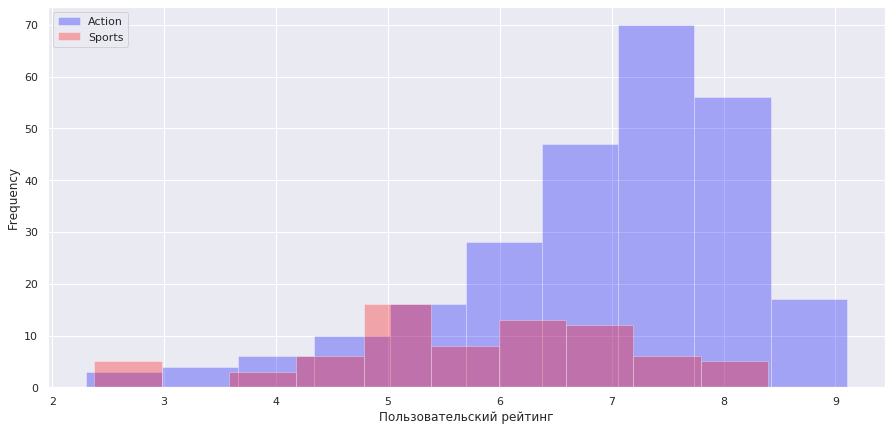

In [50]:
action_score=(actual_games_data
              .query('genre=="action"')
              .pivot_table(index=['name'], 
                           columns=None, 
                           values='user_score'
                          )
             )
                        
sports_score=(actual_games_data
              .query('genre=="sports"')
              .pivot_table(index=['name'], 
                           columns=None, 
                           values='user_score'
                          )
             )
action_score['user_score'].plot(kind='hist'
                              , bins=10
                              , facecolor='blue'
                              , alpha=0.3
                              , label="Action",figsize=(15,7))
sports_score['user_score'].plot(kind='hist'
                            , bins=10
                            , facecolor='red'
                            , alpha=0.3
                            , label="Sports")
plt.legend(loc='upper left')
results =  st.ttest_ind(action_score['user_score']
                        ,sports_score['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print ("Отвергаем нулевую гипотезу")
else:
    print ("Не получилось отвергнуть нулевую гипотезу")
plt.xlabel('Пользовательский рейтинг')

После проведения t-тестирования с вероятностью 95% гипотеза о равенстве средних двух совокупностей отвергается.

### Вывод

С помощью проверок t-тестированием двух независимых совокупностей на равенство средних, с вероятностью 95% мы не смогли опровергнуть нулевую гипотезу для игр платформ Xbox One и PC, но смогли опровергнуть для игр жанров Action и Sports.

## Общий вывод

В данном проекте мы рассмотрели массив данных из 16715 строк по продажам 11559 игр на 31 платформах, вышедших с 1980 по 2016 годы. Рассмотрены данные по выпуску игр за разные годы, выявлено снижение количества выпускаемых игр, которое произошло за последние 5 лет. В связи с этим для более подробного анализа выбраны данные с 2012 года. Самыми перспективными платформами за этот период PS4 и XOne. Самое большое за последние годы медианное значение прибыли на одну игру принадлежит платформе Х360, но также стоит отметить новую платформу XOne, которая немного отстает. Выявлена слабая прямая связь оценок критиков и продаж игр при незначительном влиянии оценок пользователей.  Выявлены самые прибыльные жанры - Action и Shooter. Рассмотрены особенности потребления в регионах и выявлены различия. Для Северной Америке самая популярная платформа - X360, в Европе - PS4, в Японии - 3DS. В Северной Америке и Европе пользуются успехом жанры Action и Shooter, а в Японии - Role-Playing и Action. Рейтинг ESRB также по разному воздействует на продажи в разных регионах. В Европе и Северной Америке у "взрослых" игр больше популярность, чем в Японии. С вероятностью 95% не опровергнута нулевая гипотеза о равенстве средних пользовательских оценок для игр платформ Xbox One и PC, но опровергнута для игр жанров Action и Sports.